# DS4F - Computational Finance
## Group Assignment

The commented code (jupyter notebook or python script) should be submitted no later than November 15th, 2024via Moodle or by email to dduarte@novaims.unl.pt. 


Group composition:
- Afonso Casanova, 20240795
- Francisco Perestrello, 20241560
- João Pardal, 20240796
- Nuno Vieira, 20241111

## 1. (5.0 pts) Working with price data

### 1.1. Download the components from the PSI20 index from the following url using Pandas

https://en.wikipedia.org/wiki/PSI-20

In [98]:
import pandas as pd

# URL for the Wikipedia page
url = "https://en.wikipedia.org/wiki/PSI-20"

# Read all the tables from the Wikipedia url
tables = pd.read_html(url)

# Getting the third table, which contains the PSI20 components
psi20_components = tables[2]
psi20_components.set_index('Company', inplace=True)

# Display the first few rows of the DataFrame
psi20_components.head()

,Industry,Ticker,Weight (%)
Company,,,
Altri,Basic Resources,ALTR,2.03
Banco Comercial Português,Banks,BCP,17.04
Corticeira Amorim,Industrial Goods & Services,COR,2.62
CTT Correios de Portugal,Industrial Goods & Services,CTT,3.02
EDP Renováveis,Utilities,EDPR,9.69


### 1.2. Since the listed tickers "XXX" don't contain the information about the exchange, use list comprehension to add ".LS" to the end of each ticker

Hint: From ["AAA", "BBB", "CCC"] to ["AAA.LS", "BBB.LS", "CCC.LS"]

In [99]:
# Using list comprehension to add a string to each ticker
psi20_components['Ticker'] = [ticker + '.LS' for ticker in psi20_components['Ticker']]

# Display the first few rows of the DataFrame
psi20_components.head()

,Industry,Ticker,Weight (%)
Company,,,
Altri,Basic Resources,ALTR.LS,2.03
Banco Comercial Português,Banks,BCP.LS,17.04
Corticeira Amorim,Industrial Goods & Services,COR.LS,2.62
CTT Correios de Portugal,Industrial Goods & Services,CTT.LS,3.02
EDP Renováveis,Utilities,EDPR.LS,9.69


### 1.3. Use Yahoo Finance (yfinance) to download the data for all ticker from 2012 to the present date

In [100]:
import yfinance as yf
from datetime import datetime

# Dates starting in 2012 until today
start_date = '2012-01-01'
end_date = datetime.now()

# Extract tickers to download to a list
tickers = psi20_components['Ticker'].tolist()

# Download data for all the tickers
data = yf.download(tickers, start = start_date, end = end_date, group_by = "Ticker")

# Display the first few rows of the DataFrame
data.head()

Got error from yahoo api for ticker SONC.LS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********************100%***********************]  18 of 18 completed

1 Failed download:
- SONC.LS: No data found for this date range, symbol may be delisted


SONC.LS                                  JMT.LS         \
                       Open High Low Close Adj Close Volume    Open   High   
Date                                                                         
2012-01-02 00:00:00     NaN  NaN NaN   NaN       NaN    NaN  12.855  13.06   
2012-01-03 00:00:00     NaN  NaN NaN   NaN       NaN    NaN  13.150  13.25   
2012-01-04 00:00:00     NaN  NaN NaN   NaN       NaN    NaN  13.010  13.25   
2012-01-05 00:00:00     NaN  NaN NaN   NaN       NaN    NaN  12.930  13.10   
2012-01-06 00:00:00     NaN  NaN NaN   NaN       NaN    NaN  12.930  13.19   

                                    ... CTT.LS                         \
                       Low   Close  ...    Low Close Adj Close Volume   
Date                                ...                                 
2012-01-02 00:00:00  12.80  13.025  ...    NaN   NaN       NaN    NaN   
2012-01-03 00:00:00  12.96  13.125  ...    NaN   NaN       NaN    NaN   
2012-01-04 00:00:00  13.00  13.000  ...    NaN   NaN       NaN    NaN   
2012-01-05 00:00:00  12.90  13.045  ...    NaN   NaN       NaN    NaN   
2012-01-06 00:00:00  12.93  13.060  ...    NaN   NaN       NaN    NaN   

                       IBS.LS                                                 
                         Open      High       Low     Close Adj Close Volume  
Date                                                                          
2012-01-02 00:00:00  2.752078  2.752078  2.752078  2.752078  2.098173      0  
2012-01-03 00:00:00  2.840199  2.880870  2.745299  2.880870  2.196363  16227  
2012-01-04 00:00:00  2.880870  2.880870  2.880870  2.880870  2.196363      0  
2012-01-05 00:00:00  2.813085  2.880870  2.813085  2.846977  2.170523  29258  
2012-01-06 00:00:00  2.846977  2.846977  2.846977  2.846977  2.170523      0  

[5 rows x 108 columns]

### 1.4. Eliminate tickers that don't have prices since 2012

In [101]:
for ticker in tickers:
    if data[ticker]['Adj Close'].isna().any(): # If there are NaN values in each ticker's "Adj Close" column, remove the ticker
        data.drop(columns=ticker, inplace=True)

data.head()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_21592\931539365.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns=ticker, inplace=True)


JMT.LS                                           RENE.LS  \
                       Open   High    Low   Close Adj Close  Volume      Open   
Date                                                                            
2012-01-02 00:00:00  12.855  13.06  12.80  13.025  8.648353  152170  1.989501   
2012-01-03 00:00:00  13.150  13.25  12.96  13.125  8.714750  431782  1.980072   
2012-01-04 00:00:00  13.010  13.25  13.00  13.000  8.631752  462349  1.951786   
2012-01-05 00:00:00  12.930  13.10  12.90  13.045  8.661631  562794  1.901812   
2012-01-06 00:00:00  12.930  13.19  12.93  13.060  8.671591  215578  1.839582   

                                                   ...    GALP.LS             \
                         High       Low     Close  ...        Low      Close   
Date                                               ...                         
2012-01-02 00:00:00  1.989501  1.964986  1.973472  ...  11.733908  12.052150   
2012-01-03 00:00:00  1.980072  1.948957  1.951786  ...  11.913561  12.693768   
2012-01-04 00:00:00  1.951786  1.876354  1.885783  ...  12.442254  12.627040   
2012-01-05 00:00:00  1.907470  1.837696  1.839582  ...  12.524381  12.580843   
2012-01-06 00:00:00  1.903698  1.839582  1.885783  ...  12.585976  13.047941   

                                          IBS.LS                      \
                    Adj Close   Volume      Open      High       Low   
Date                                                                   
2012-01-02 00:00:00  7.314837   264290  2.752078  2.752078  2.752078   
2012-01-03 00:00:00  7.704257  1474200  2.840199  2.880870  2.745299   
2012-01-04 00:00:00  7.663755  1761124  2.880870  2.880870  2.880870   
2012-01-05 00:00:00  7.635719   986054  2.813085  2.880870  2.813085   
2012-01-06 00:00:00  7.919216  1404885  2.846977  2.846977  2.846977   

                                                
                        Close Adj Close Volume  
Date                                            
2012-01-02 00:00:00  2.752078  2.098173      0  
2012-01-03 00:00:00  2.880870  2.196363  16227  
2012-01-04 00:00:00  2.880870  2.196363      0  
2012-01-05 00:00:00  2.846977  2.170523  29258  
2012-01-06 00:00:00  2.846977  2.170523      0  

[5 rows x 96 columns]

### 1.5. Create a new DataFrame with the returns using the column "Adj Close"

$return = \frac{price_t}{price_{t-1}}  - 1 $


Hint: there is a pandas function that performs this calculation directly

In [114]:
tickers = psi20_components['Ticker'].tolist()
returns = pd.DataFrame()

for ticker in tickers:
    if ticker in data.columns:
        returns[ticker] = data[ticker]['Adj Close'].pct_change().dropna()
    
returns.head()

,ALTR.LS,BCP.LS,COR.LS,EDPR.LS,EDP.LS,GALP.LS,IBS.LS,JMT.LS,EGL.LS,NOS.LS,NBA.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS,NVG.LS
Date,,,,,,,,,,,,,,,,
2012-01-03,0.038884,0.048950,-0.007143,-0.009028,0.001219,0.053237,0.046798,0.007677,-0.007619,0.060729,-0.019139,0.013137,-0.010989,-0.002559,0.010684,0.012834
2012-01-04,-0.033360,-0.120000,-0.007195,-0.007415,0.002842,-0.005257,0.000000,-0.009524,-0.000960,-0.066794,-0.024390,-0.025494,-0.033817,-0.001100,-0.021142,-0.020592
2012-01-05,-0.021885,-0.083332,-0.021739,0.003202,-0.028340,-0.003658,-0.011765,0.003461,-0.005764,-0.028221,0.005000,-0.009923,-0.024499,-0.018349,-0.030237,-0.005930
2012-01-06,0.012908,0.123966,0.000000,0.033830,0.001667,0.037128,0.000000,0.001150,0.009662,0.012205,-0.004975,-0.002278,0.025115,0.026729,0.002227,0.009761
2012-01-09,-0.011894,0.036765,0.000000,-0.016258,-0.009567,-0.006294,0.000000,0.008806,-0.009569,0.002495,0.000000,-0.018037,0.004000,-0.035135,0.006667,-0.018260


### 1.6. Make a plot with the cumulative return of all tickers on the same axis

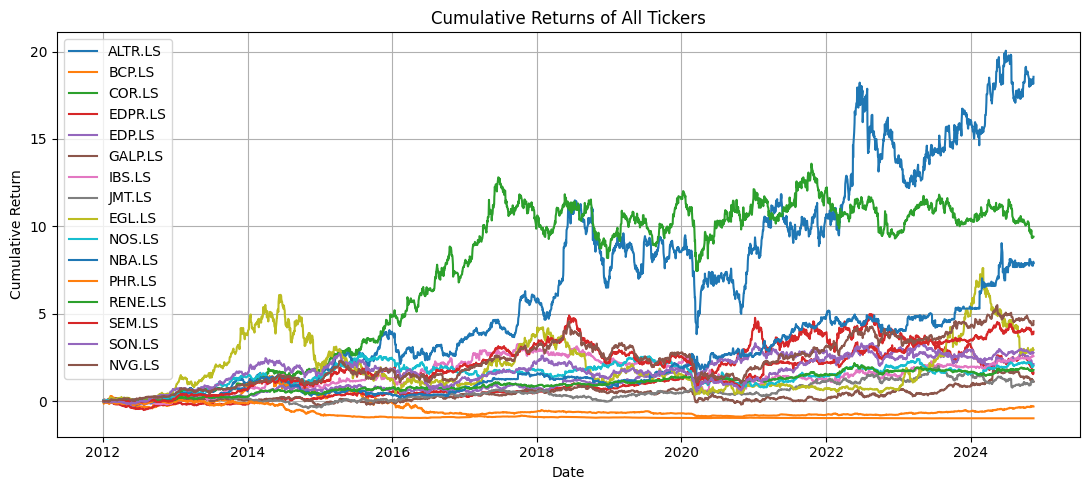

In [108]:
import matplotlib.pyplot as plt

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plotting
plt.figure(figsize=(11, 5))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.title('Cumulative Returns of All Tickers')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 1.7. Make a histogram for the returns
- Use one figure for all plots with 4 subplots in each row
- Define a title for each graph with the ticker
- Use the same axis scale for x and y

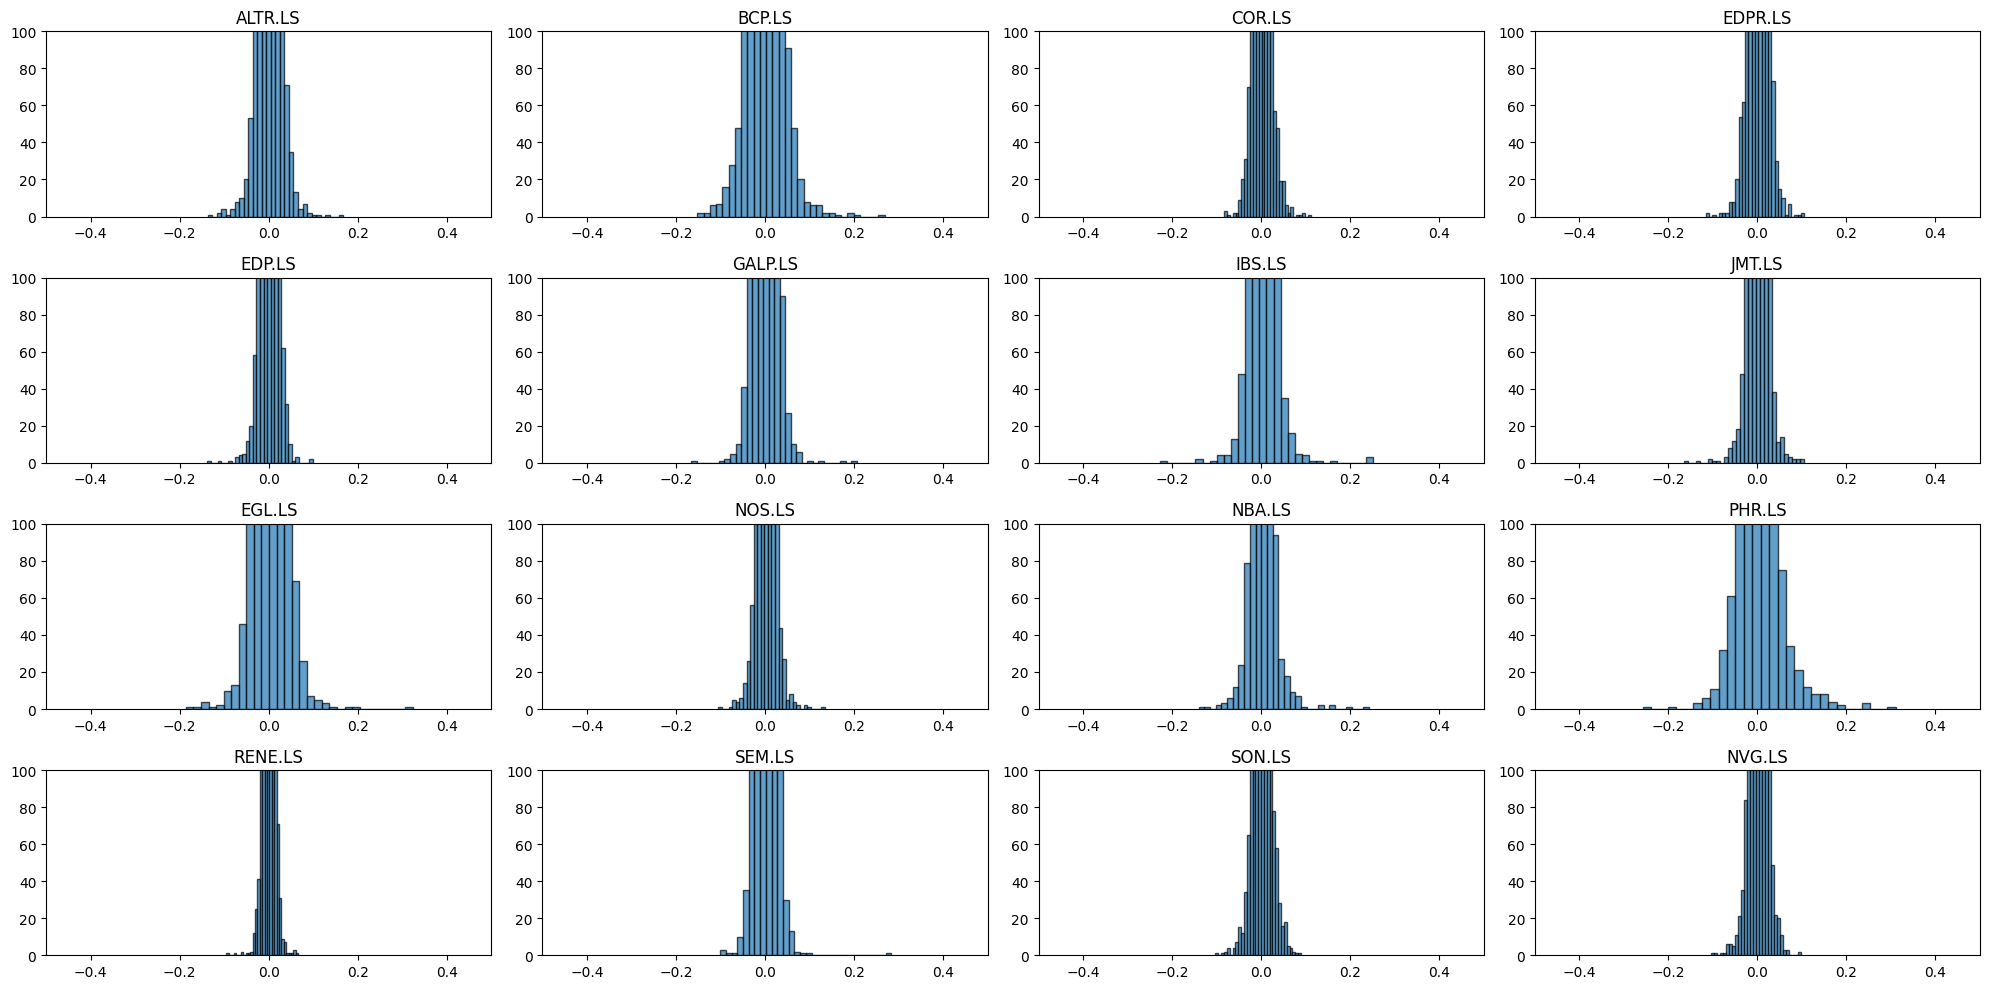

In [109]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10))  # 4 rows, 4 columns for the 16 assets
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for i, ticker in enumerate(returns.columns):
    axs[i].hist(returns[ticker], bins=30, alpha=0.7, edgecolor='black')
    axs[i].set_title(ticker)
    axs[i].set_xlim([-0.5, 0.5])  # Set the same x-axis scale
    axs[i].set_ylim([0, 100])  # Set the same y-axis scale

plt.tight_layout()
plt.show()

### 1.8. Create a correlation matriz of the returns

In [110]:
# Calculate the correlation matrix for returns
correlation_matrix = returns.corr()

correlation_matrix.head()

,ALTR.LS,BCP.LS,COR.LS,EDPR.LS,EDP.LS,GALP.LS,IBS.LS,JMT.LS,EGL.LS,NOS.LS,NBA.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS,NVG.LS
ALTR.LS,1.000000,0.356149,0.240500,0.283564,0.326059,0.351577,0.125805,0.244547,0.344487,0.363118,0.179501,0.223221,0.335506,0.478037,0.458597,0.622683
BCP.LS,0.356149,1.000000,0.164818,0.216311,0.252437,0.327509,0.115144,0.209240,0.345990,0.303650,0.159216,0.218558,0.263866,0.323726,0.428717,0.367376
COR.LS,0.240500,0.164818,1.000000,0.169802,0.178796,0.172970,0.106852,0.141489,0.208911,0.189680,0.138551,0.097324,0.192982,0.213781,0.193439,0.259818
EDPR.LS,0.283564,0.216311,0.169802,1.000000,0.640022,0.218207,0.093000,0.240686,0.215857,0.280606,0.118547,0.140449,0.411018,0.255461,0.311212,0.292301
EDP.LS,0.326059,0.252437,0.178796,0.640022,1.000000,0.290482,0.092694,0.285832,0.279823,0.327560,0.123021,0.184276,0.481715,0.290252,0.378992,0.352281


### 1.9. Save the data (Adj Close Price and Volume) to a CSV file, separate file for each ticker

In [35]:
for ticker in returns.columns: 
    # Select only 'Adj Close' and 'Volume' for the ticker
    ticker_data = data[ticker][['Adj Close', 'Volume']]

    # Save all the tickers into a individual csvs
    ticker_data.to_csv(f'{ticker}_data.csv')

### 1.10. Load the data from the CSV files that you just saved to one DataFrame with the prices per ticker

In [36]:
import glob # library to help us deal with files in the system

# Load all CSV files into a single DataFrame
all_files = glob.glob("*_data.csv")  # Get all CSV files in the current directory
price_dataframes = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, parse_dates=True)  # Read each CSV file
    ticker = filename.split('_')[0]  # Extract ticker from filename
    df = df[['Adj Close']]  # Select only the 'Adj Close' column
    df.columns = [ticker]  # Rename the column to the ticker
    price_dataframes.append(df)

# Concatenate all DataFrames into one by index
price_data = pd.concat(price_dataframes, axis=1)

# Display the first few rows of the combined DataFrame
price_data.head()  

,ALTR.LS,BCP.LS,COR.LS,EDP.LS,EDPR.LS,EGL.LS,GALP.LS,IBS.LS,JMT.LS,NBA.LS,NOS.LS,NVG.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS
Date,,,,,,,,,,,,,,,,
2012-01-02,0.261043,0.642360,0.788619,1.096663,4.185902,0.654204,7.030363,2.098173,8.648352,0.657427,1.133649,0.646490,2.822735,0.841514,2.877418,0.244075
2012-01-03,0.271194,0.673803,0.782986,1.098001,4.148113,0.649220,7.404638,2.196363,8.714749,0.644845,1.202494,0.654787,2.859818,0.832267,2.870054,0.246683
2012-01-04,0.262147,0.592947,0.777353,1.101121,4.117352,0.648597,7.365716,2.196363,8.631752,0.629117,1.122175,0.641304,2.786908,0.804123,2.866897,0.241467
2012-01-05,0.256410,0.543535,0.760454,1.069915,4.130536,0.644859,7.338766,2.170523,8.661633,0.632263,1.090506,0.637501,2.759253,0.784422,2.814294,0.234166
2012-01-06,0.259719,0.610915,0.760454,1.071699,4.270270,0.651089,7.611235,2.170523,8.671592,0.629117,1.103816,0.643724,2.752968,0.804123,2.889517,0.234687


### 1.11. Group (sum) the volume for each asset by year, month

In [37]:
volume_dataframes = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, parse_dates=True)  # Read each CSV file
    ticker = filename.split('_')[0]  # Extract ticker from filename
    df = df[['Volume']]  # Select only the 'Volume' column
    df.columns = [ticker]  # Rename the column to the ticker
    volume_dataframes.append(df)

# Concatenate all DataFrames into one by index
volume_data = pd.concat(volume_dataframes, axis=1)

# Group the volume by year and month
volume_by_month = volume_data.resample('M').sum()

# Display the first few rows of the grouped DataFrame
volume_by_month.head()

,ALTR.LS,BCP.LS,COR.LS,EDP.LS,EDPR.LS,EGL.LS,GALP.LS,IBS.LS,JMT.LS,NBA.LS,NOS.LS,NVG.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS
Date,,,,,,,,,,,,,,,,
2012-01-31,3115705,407815360,142693,129543689,14392738,1732904,24365178,71820,11724980,238615,11866080,3455474,62450893,3827358,1498325,30402041
2012-02-29,4548409,621519083,78792,130157109,13898933,4858139,28609208,74246,14358151,214278,8318729,4037731,76955801,2952523,1340791,39050733
2012-03-31,5919776,290350860,411730,135800694,12567131,1840524,27729415,217382,14756804,230644,6074238,3633688,57843754,31847178,1374240,47155758
2012-04-30,2946106,192273373,164452,88022905,17984759,4872405,31601868,89264,14874039,145334,4555873,6218683,67258885,1984371,1197362,38829171
2012-05-31,3207600,154520229,227731,176322716,42345863,5137230,30718321,12574,10834840,279343,94072326,2840640,106228112,1472468,1001244,30865262


### 1.12. Make a bar plot with the volume per month, per ticker

- One single plot
- X Axis has 12 ticks (months)

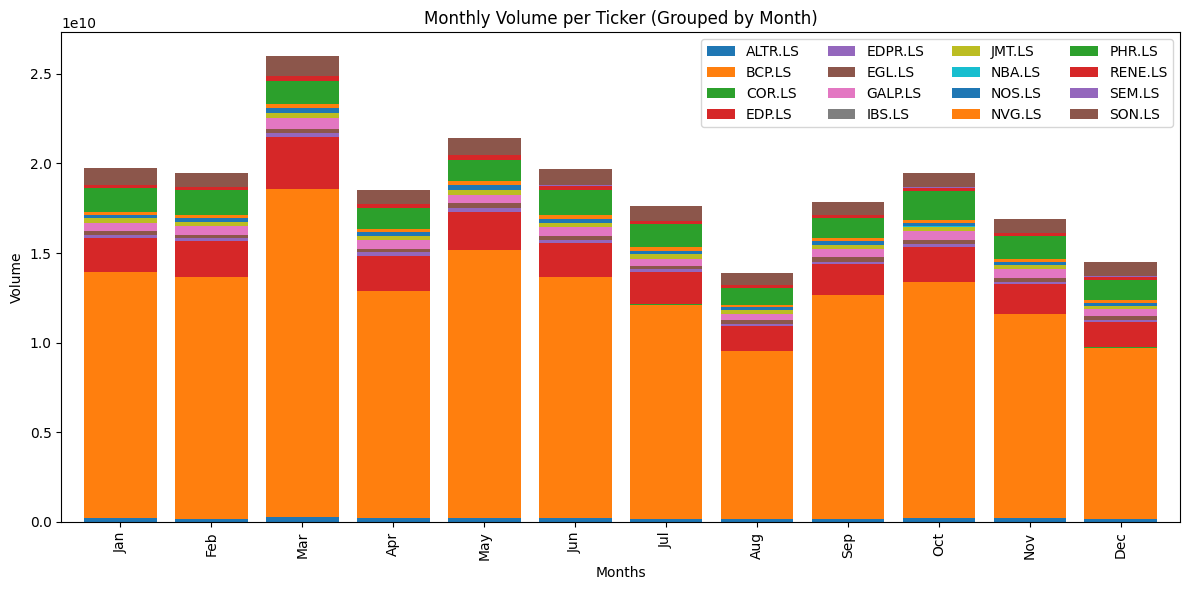

In [47]:
# Group the volume by month across all years
volume_by_month_grouped = volume_data.groupby(volume_data.index.month).sum()

# Plotting the volume per month for each ticker
volume_by_month_grouped.plot(kind = 'bar', stacked = True, figsize = (12, 6), width = 0.8)

# Setting the title and labels
plt.title('Monthly Volume per Ticker (Grouped by Month)')
plt.xlabel('Months')
plt.ylabel('Volume')

# Setting the x-ticks to show all 12 months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks = range(12), labels = months)

# Adjust the legend
plt.legend(loc='upper right', ncol=len(volume_by_month_grouped.columns)/4)

# Show the plot
plt.tight_layout()
plt.show()

## 2. (5 pts) Optimization

We will discuss why setting a target return is crucial for portfolio management


- Downlad from YahooFinance the price of Bitcoin (BTC-USD), ETHEREUM (ETH-USD), SOLANA (SOL-USD), and three stocks of your choice for the period between 30.06.2024 and 30.09.2024.
- Calculate the average daily return for the period and annualize it
- Build a portfolio with the six assets with that has a target return of 35%, with the following restrictions:
    - Sum of weights = 100%
    - Total allocation to criptocurrencies should be at most 30% 


In [122]:
import numpy as np
from scipy.optimize import minimize

# Defining asset tickers and download price data
crypto_tickers = ["BTC-USD", "ETH-USD", "SOL-USD"]
stock_tickers = ["TSLA", "MSFT", "GOOGL"]  # Three Assets 
tickers = crypto_tickers + stock_tickers
start_date = "2024-06-30"
end_date = "2024-09-30"

# Download data
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns and annualize them
daily_returns = data.pct_change().dropna() # DropNa = for the first day where no prior day exists
avg_daily_returns = daily_returns.mean()
annualized_returns = avg_daily_returns * 252  # Annualize assuming 252 trading days

# Building the target return portfolio
# Defining the constraints for optimization
target_return = 0.35  # Target return of 35%
crypto_max_weight = 0.30  # Maximum 30% in cryptocurrencies

# Defining initial weights (equal weighting as starting point)
initial_weights = np.array([1/len(tickers)] * len(tickers))

# Defining bounds for each asset (each weight between 0 and 1)
bounds = [(0, 1) for _ in range(len(tickers))]

# Defining constraints
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Sum of weights = 1
    {'type': 'ineq', 'fun': lambda weights: crypto_max_weight - np.sum(weights[:3])},  # Crypto max weight = 0.3
    {'type': 'eq', 'fun': lambda weights: np.dot(weights, annualized_returns) - target_return}  # Target return constraint
]

# Defining the objective function (we want to minimize risk for given return)
def portfolio_volatility(weights):
    # Calculate portfolio variance
    portfolio_variance = np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)) # Using annualized variance-covariance matrix
    return np.sqrt(portfolio_variance)  # Portfolio volatility (risk)

# Optimize weights
result = minimize(portfolio_volatility, initial_weights, bounds=bounds, constraints=constraints)

# Results
if result.success:
    optimal_weights = result.x
    portfolio_return = np.dot(optimal_weights, annualized_returns)
    portfolio_volatility = portfolio_volatility(optimal_weights)
    print("Optimal Weights:", {ticker: round(weight, 2) for ticker, weight in zip(tickers, optimal_weights)})
    print(f"Expected Portfolio Return: {portfolio_return*100:.2f}%")
    print(f"Portfolio Volatility (Risk): {portfolio_volatility*100:.2f}%")
else:
    print("Optimization did not converge")

[*********************100%***********************]  6 of 6 completed
Optimal Weights: {'BTC-USD': 0.2, 'ETH-USD': 0.0, 'SOL-USD': 0.0, 'TSLA': 0.31, 'MSFT': 0.07, 'GOOGL': 0.43}
Expected Portfolio Return: 35.00%
Portfolio Volatility (Risk): 10.69%


## 3. (5 pts) Randon Numbers 

#### 3.1. Creating Random Numbers

- Generate a set of 5000 random numbers from three different distributions (uniform, normal, Poisson, etc.), setting the seed for reproducibility
- Plot the histogram for each set

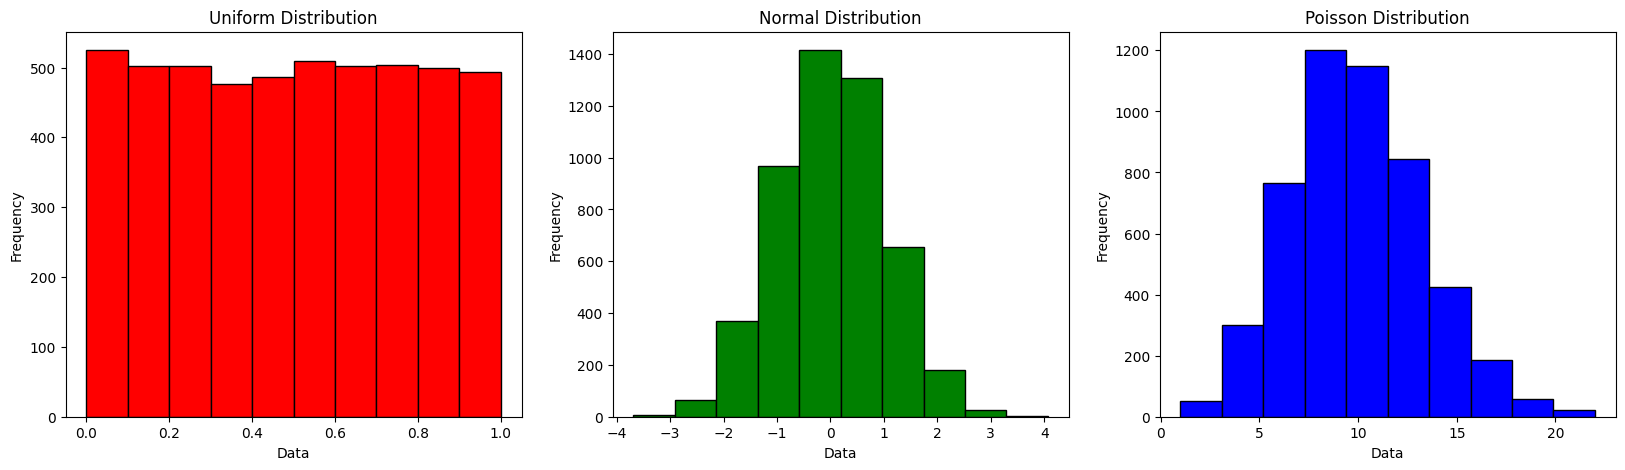

In [123]:
np.random.seed(123)

uniform_numbers = np.random.uniform(size = 5000)
normal_numbers = np.random.normal(size = 5000)
poisson_numbers = np.random.poisson(lam=10, size = 5000)

plt.subplots(1, 3, figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(uniform_numbers, color = "red", edgecolor = "black")
plt.title("Uniform Distribution")
plt.xlabel("Data")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
plt.hist(normal_numbers, color = "green", edgecolor = "black")
plt.title("Normal Distribution")
plt.xlabel("Data")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
plt.hist(poisson_numbers, color = "blue", edgecolor = "black")
plt.title("Poisson Distribution")
plt.xlabel("Data")
plt.ylabel("Frequency")

plt.show()

#### 3.2. Using Random Numbers

Consider there was the following game in a casino:
- There are chips containing numbers ranging from 1–100 in a bag.
- Users can bet on even or odd chips.
- In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number.
- If we bet on even numbers and we get 10 then we lose.
- If we bet on odd numbers and we get 11 then we lose.

(A) Using Montecarlo simulation, show that the "house" always wins in the long term at this game. Comment the results

(B) Using Montecarlo simulation estimate what would be the expected final capital if you have 10k and you play the game 1000 times where you bet 10 USD to play and you receive double the amount if you win and loose the bet amount if you loose. Comment the results

### (A)

In [124]:
np.random.seed(123)

simulations = 100000
player_wins = 0
casino_wins = 0

chips = list(range(1, 101))

for _ in range(simulations):
    
    player_choice = np.random.choice(["even","odd"])                
    chip_result = np.random.choice(chips)    
    
    if (chip_result == 10 and player_choice == 'even') or (chip_result == 11 and player_choice == 'odd'):            
        casino_wins += 1
        
    else:
        if (chip_result % 2 == 0 and player_choice == "even") or (chip_result % 2 != 0 and player_choice == "odd"):
            player_wins += 1
        else:
            casino_wins += 1

player_win_percentage = (player_wins / simulations) * 100
house_win_percentage = (casino_wins / simulations) * 100

print(f"Player win percentage: {player_win_percentage:.2f}%")
print(f"House win percentage: {house_win_percentage:.2f}%")
print(f"House edge: {0.5 * 100 - player_win_percentage:.2f}%")

Player win percentage: 49.11%
House win percentage: 50.89%
House edge: 0.89%


Comment: Due to chips 10 and 11, the house gains an edge, having a probability of winning 51 out of 100 times, independently of the player's selection (odd or even). Our code accurately captures this house edge, with our results closely aligning with the true probabilities (51% vs. 49%). The slight difference between our result and the expected result can be explained by the inherent properties of probability (randomness), but as the number of simulations increases, the final results will always converge to the true probability

### (B)

In [55]:
np.random.seed(123)

simulations = 1000
games = 1000
player_wins = 0
casino_wins = 0

chips = list(range(1, 101))

player_initial_cash = 10000.00
bet_amount = 10.00
final_cashes = []

for _ in range(simulations):
    player_current_cash = player_initial_cash
    for _ in range(games):

        # Take 10 USD from current_cash of User as it places a bet
        player_current_cash -= bet_amount
        player_choice = np.random.choice(["even","odd"])                
        chip_result = np.random.choice(chips)    

        if (chip_result == 10 and player_choice == 'even') or (chip_result == 11 and player_choice == 'odd'):            
            casino_wins += 1

        else:
            if (chip_result % 2 == 0 and player_choice == "even") or (chip_result % 2 != 0 and player_choice == "odd"):
                player_wins += 1
                player_current_cash += (bet_amount * 2)
            else:
                casino_wins += 1

    final_cashes.append(player_current_cash)
        

# Calculate expected final capital
mean_final = np.mean(final_cashes)

print(f"Average final capital: ${mean_final:.2f} USD")
print(f"Expected loss: ${player_initial_cash - mean_final:.2f} USD")

Average final capital: $9798.58 USD
Expected loss: $201.42 USD


Comment: The expected loss for the player is based on the difference between the house win percentage and the player win percentage. As seen above, the house has a probability of winning 51% of the time, while the player has 49%, so the player’s expected losses are approximately 2% of their initial money over time - the same as the house's edge, as expected.

### 4. (5 pts) Yield curves


In [58]:
bonds = np.array([[  1.  , 100.51,   3.  ],
       [  2.  , 100.12,   2.7 ],
       [  3.  ,  99.22,   2.5 ],
       [  4.  ,  93.34,   1.1 ],
       [  5.  ,  95.53,   2.  ],
       [  6.  ,  94.88,   2.1 ],
       [  7.  ,  91.29,   1.7 ],
       [  8.  , 101.05,   3.3 ],
       [  9.  ,  83.13,   1.  ],
       [ 10.  , 101.55,   3.4 ]])

#### 4.1. Build a class called YieldCurve that will receive an array with information on maturity, price and coupon for n bonds (n x 3) 


In [59]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:,0]
        self.price = bonds[:,1]
        self.coupon = bonds[:,2]

test = YieldCurve(bonds)
test.maturity, test.price, test.coupon

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([100.51, 100.12,  99.22,  93.34,  95.53,  94.88,  91.29, 101.05,
         83.13, 101.55]),
 array([3. , 2.7, 2.5, 1.1, 2. , 2.1, 1.7, 3.3, 1. , 3.4]))

#### 4.2. Add a method that will determine the discount factors using matrix operations 

In [60]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:, 0]
        self.price = bonds[:, 1]
        self.coupon = bonds[:, 2]
    
    def cashflows(self): #defined this cashflows method for ease of use of other methods
        cashflows = np.zeros((len(self.maturity), len(self.maturity))) # NOT SURE ABOUT THIS NR OF COLUMNS
        for i in range(len(self.maturity)):
            cashflows[i, :int(self.maturity[i])] = self.coupon[i]  # Fill cashflows with coupon payments
            cashflows[i, int(self.maturity[i])-1] += 100  # Assuming a face value of 100 at maturity
        return cashflows

    def matrix_dfs(self):
        # Calculate the discount factors using matrix operations
        discount_factors = np.linalg.inv(self.cashflows()) @ self.price
        return discount_factors
    
test = YieldCurve(bonds)
test.matrix_dfs()

array([0.97582524, 0.94922368, 0.92104759, 0.89227788, 0.86326717,
       0.83463813, 0.80676819, 0.77877969, 0.75354626, 0.72643838])

#### 4.3. Add a method that will determine the discount factors using a global solver, ie, solving for all the discount factors at the same time

In [61]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:, 0]
        self.price = bonds[:, 1]
        self.coupon = bonds[:, 2]
    
    def cashflows(self): 
        cashflows = np.zeros((len(self.maturity), len(self.maturity))) # NOT SURE ABOUT THIS NR OF COLUMNS
        for i in range(len(self.maturity)):
            cashflows[i, :int(self.maturity[i])] = self.coupon[i]  # Fill cashflows with coupon payments
            cashflows[i, int(self.maturity[i])-1] += 100  # Assuming a face value of 100 at maturity
        return cashflows

    def matrix_dfs(self):
        # Calculate the discount factors using matrix operations
        discount_factors = np.linalg.inv(self.cashflows()) @ self.price
        return discount_factors
    
    def solver_dfs(self):
        # Define the objective function to minimize
        def objective(discount_factors):
            present_values = np.sum(self.cashflows() *  discount_factors, axis=1) 
            return np.sum((present_values - self.price) ** 2)
        
        initial_guess = np.ones(len(self.maturity))
        discount_factors = minimize(objective, initial_guess)['x']
        return discount_factors        

test = YieldCurve(bonds)
test.solver_dfs()

array([0.97582524, 0.94922367, 0.92104758, 0.89227788, 0.86326716,
       0.83463812, 0.80676818, 0.77877969, 0.75354626, 0.72643838])

#### 4.4. Add a method that will bootstrap the discount factors using an iterative procedure, ie, solving for the shortest expiry to the longest

In [62]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:, 0]
        self.price = bonds[:, 1]
        self.coupon = bonds[:, 2]
    
    def cashflows(self): 
        cashflows = np.zeros((len(self.maturity), len(self.maturity))) # NOT SURE ABOUT THIS NR OF COLUMNS
        for i in range(len(self.maturity)):
            cashflows[i, :int(self.maturity[i])] = self.coupon[i]  # Fill cashflows with coupon payments
            cashflows[i, int(self.maturity[i])-1] += 100  # Assuming a face value of 100 at maturity
        return cashflows

    def matrix_dfs(self):
        # Calculate the discount factors using matrix operations
        discount_factors = np.linalg.inv(self.cashflows()) @ self.price
        return discount_factors
    
    def solver_dfs(self):
        # Define the objective function to minimize
        def objective(discount_factors):
            present_values = np.sum(self.cashflows() *  discount_factors, axis=1) 
            return np.sum((present_values - self.price) ** 2)
        
        initial_guess = np.ones(len(self.maturity))
        discount_factors = minimize(objective, initial_guess)['x']
        return discount_factors
    
    def bootstrap_dfs(self):
        discount_factors = np.zeros(len(self.maturity))
        for idx in range(len(self.maturity)):
            previous_cfs = self.cashflows()[idx, :idx]
            discount_factors[idx] = (self.price[idx] - previous_cfs @ discount_factors[:idx]) / self.cashflows()[idx, idx]
        return discount_factors

test = YieldCurve(bonds)
test.bootstrap_dfs()

array([0.97582524, 0.94922368, 0.92104759, 0.89227788, 0.86326717,
       0.83463813, 0.80676819, 0.77877969, 0.75354626, 0.72643838])

#### 4.5. Add a method to determine the spot rate (annual compounding) for each maturity from the calculated discount factors

In [63]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:, 0]
        self.price = bonds[:, 1]
        self.coupon = bonds[:, 2]
    
    def cashflows(self): 
        cashflows = np.zeros((len(self.maturity), len(self.maturity))) # NOT SURE ABOUT THIS NR OF COLUMNS
        for i in range(len(self.maturity)):
            cashflows[i, :int(self.maturity[i])] = self.coupon[i]  # Fill cashflows with coupon payments
            cashflows[i, int(self.maturity[i])-1] += 100  # Assuming a face value of 100 at maturity
        return cashflows

    def matrix_dfs(self):
        # Calculate the discount factors using matrix operations
        discount_factors = np.linalg.inv(self.cashflows()) @ self.price
        return discount_factors
    
    def solver_dfs(self):
        # Define the objective function to minimize
        def objective(discount_factors):
            present_values = np.sum(self.cashflows() *  discount_factors, axis=1) 
            return np.sum((present_values - self.price) ** 2)
        
        initial_guess = np.ones(len(self.maturity))
        discount_factors = minimize(objective, initial_guess)['x']
        return discount_factors
    
    def bootstrap_dfs(self):
        discount_factors = np.zeros(len(self.maturity))
        for i in range(len(self.maturity)):
            previous_cfs = self.cashflows()[i, :i]
            discount_factors[i] = (self.price[i] - previous_cfs @ discount_factors[:i]) / self.cashflows()[i, i]
        return discount_factors
    
    def spot_rates(self, discount_factors):
        spot_rates = np.zeros(len(self.maturity))
        for i in range(len(discount_factors)):
            spot_rates[i] = (1/discount_factors[i]) ** (1/self.maturity[i]) - 1
        return spot_rates

test = YieldCurve(bonds)
test.spot_rates(test.solver_dfs())

array([0.02477366, 0.02639782, 0.02779376, 0.02890427, 0.02984284,
       0.03058456, 0.03114943, 0.0317469 , 0.03194002, 0.03247637])

#### 4.6. Determine the 1y forward rate starting in each of the years from 1 to 9 and plot them

In [64]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:, 0]
        self.price = bonds[:, 1]
        self.coupon = bonds[:, 2]
    
    def cashflows(self): 
        cashflows = np.zeros((len(self.maturity), len(self.maturity))) # NOT SURE ABOUT THIS NR OF COLUMNS
        for i in range(len(self.maturity)):
            cashflows[i, :int(self.maturity[i])] = self.coupon[i]  # Fill cashflows with coupon payments
            cashflows[i, int(self.maturity[i])-1] += 100  # Assuming a face value of 100 at maturity
        return cashflows

    def matrix_dfs(self):
        # Calculate the discount factors using matrix operations
        discount_factors = np.linalg.inv(self.cashflows()) @ self.price
        return discount_factors
    
    def solver_dfs(self):
        # Define the objective function to minimize
        def objective(discount_factors):
            present_values = np.sum(self.cashflows() *  discount_factors, axis=1) 
            return np.sum((present_values - self.price) ** 2)
        
        initial_guess = np.ones(len(self.maturity))
        discount_factors = minimize(objective, initial_guess)['x']
        return discount_factors
    
    def bootstrap_dfs(self):
        discount_factors = np.zeros(len(self.maturity))
        for i in range(len(self.maturity)):
            previous_cfs = self.cashflows()[i, :i]
            discount_factors[i] = (self.price[i] - previous_cfs @ discount_factors[:i]) / self.cashflows()[i, i]
        return discount_factors
    
    def spot_rates(self, discount_factors):
        spot_rates = np.zeros(len(self.maturity))
        for i in range(len(discount_factors)):
            spot_rates[i] = (1/discount_factors[i]) ** (1/self.maturity[i]) - 1
        return spot_rates

    def one_year_forward_rates(self, discount_factors):
        # Must pass discount_factors from which to compute the spot rates
        spot_rates = self.spot_rates(discount_factors)
        one_year_forward_rates = np.zeros(len(spot_rates) - 1)
        for i in range(len(one_year_forward_rates)):
            one_year_forward_rates[i] = ((1 + spot_rates[i+1]) ** (i+2) / (1 + spot_rates[i]) ** (i+1)) - 1
        return one_year_forward_rates
    
test = YieldCurve(bonds)
test.one_year_forward_rates(test.solver_dfs())

array([0.02802455, 0.03059135, 0.03224299, 0.03360572, 0.03430115,
       0.03454516, 0.03593891, 0.03348624, 0.03731614])

Text(0, 0.5, 'Rate (%)')

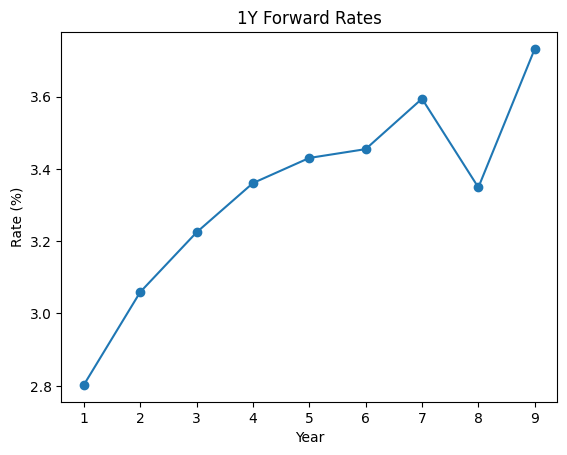

In [66]:
plt.plot(test.maturity[:-1], test.one_year_forward_rates(test.solver_dfs())*100, '-o')
plt.title('1Y Forward Rates')
plt.xlabel('Year')
plt.ylabel('Rate (%)')


#### 4.7. Add a method to determine the YTM (Yield to Maturity) for each bond

In [125]:
class YieldCurve():
    def __init__(self, bonds):
        self.maturity = bonds[:, 0]
        self.price = bonds[:, 1]
        self.coupon = bonds[:, 2]
    
    def cashflows(self): 
        cashflows = np.zeros((len(self.maturity), len(self.maturity))) # NOT SURE ABOUT THIS NR OF COLUMNS
        for i in range(len(self.maturity)):
            cashflows[i, :int(self.maturity[i])] = self.coupon[i]  # Fill cashflows with coupon payments
            cashflows[i, int(self.maturity[i])-1] += 100  # Assuming a face value of 100 at maturity
        return cashflows

    def matrix_dfs(self):
        # Calculate the discount factors using matrix operations
        discount_factors = np.linalg.inv(self.cashflows()) @ self.price
        return discount_factors
    
    def solver_dfs(self):
        # Define the objective function to minimize
        def objective(discount_factors):
            present_values = np.sum(self.cashflows() *  discount_factors, axis=1) 
            return np.sum((present_values - self.price) ** 2)
        
        initial_guess = np.ones(len(self.maturity))
        discount_factors = minimize(objective, initial_guess)['x']
        return discount_factors
    
    def bootstrap_dfs(self):
        discount_factors = np.zeros(len(self.maturity))
        for i in range(len(self.maturity)):
            previous_cfs = self.cashflows()[i, :i]
            discount_factors[i] = (self.price[i] - previous_cfs @ discount_factors[:i]) / self.cashflows()[i, i]
        return discount_factors
    
    def spot_rates(self, discount_factors):
        spot_rates = np.zeros(len(self.maturity))
        for i in range(len(discount_factors)):
            spot_rates[i] = (1/discount_factors[i]) ** (1/self.maturity[i]) - 1
        return spot_rates

    def one_year_forward_rates(self, discount_factors):
        # Must pass discount_factors from which to compute the spot rates
        spot_rates = self.spot_rates(discount_factors)
        one_year_forward_rates = np.zeros(len(spot_rates) - 1)
        for i in range(len(one_year_forward_rates)):
            one_year_forward_rates[i] = ((1 + spot_rates[i+1]) ** (i+2) / (1 + spot_rates[i]) ** (i+1)) - 1
        return one_year_forward_rates

    def ytm(self):
        yields = np.zeros(len(self.maturity))
        for i in range(len(self.maturity)):
            # Define objective function that calculates NPV given a yield
            def objective(y):
                cashflows = self.cashflows()[i,:]
                npv = -self.price[i] # Initial cash outflow is negative price
                for t, cf in enumerate(cashflows, 1):
                    npv += cf / (1 + y) ** t
                return abs(npv) # Minimize absolute value to find where NPV = 0
            
            # Find YTM using optimization, starting with 5% initial guess
            result = minimize(objective, x0=0.05)
            yields[i] = result.x[0]
        return yields 
    
test = YieldCurve(bonds)
test.ytm()

array([0.02477365, 0.02637615, 0.02774559, 0.02886876, 0.02975358,
       0.03046599, 0.03103466, 0.03149475, 0.03185458, 0.03216281])

#### 4.8. Make a plot of the spot rates, yields and forwards rates with a legend identifying the series 

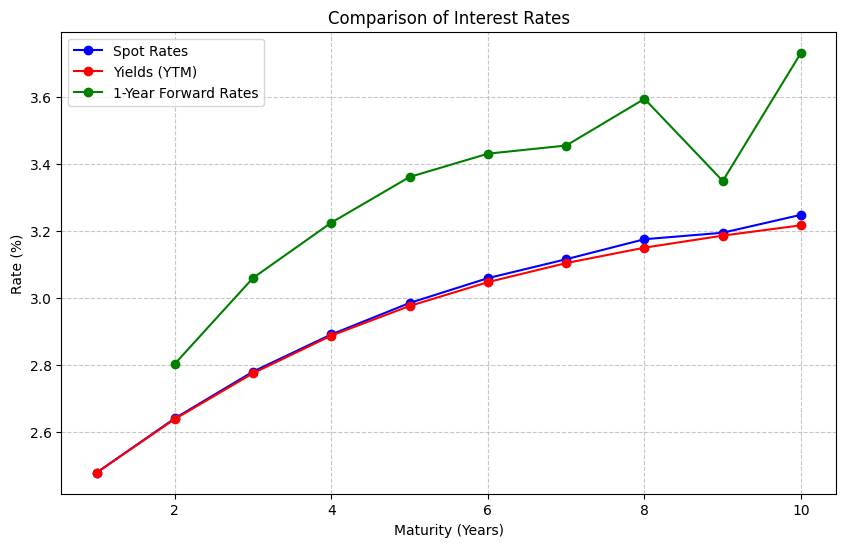

In [82]:
# Calculate the different rates
dfs = test.solver_dfs()
spot_rates = test.spot_rates(dfs)
forward_rates = test.one_year_forward_rates(dfs)
yields = test.ytm()

# Create x-axis values for plotting
maturities = test.maturity
forward_maturities = maturities[1:] # Forward rates are only up to 9

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(maturities, spot_rates * 100, 'b-o', label='Spot Rates')
plt.plot(maturities, yields * 100, 'r-o', label='Yields (YTM)')
plt.plot(forward_maturities, forward_rates * 100, 'g-o', label='1-Year Forward Rates')

# Set labels and title
plt.xlabel('Maturity (Years)')
plt.ylabel('Rate (%)')
plt.title('Comparison of Interest Rates')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()